# MiniProject : Tcas with KNN
#### (Miniproject.ipynb)

###### In this lab, you will learn how to perform linear regression with Python

The steps included in this lab are:
1. Importing Python packages 
2. Reading a dataset
3. Basic Exploration & Data Pre-processing: Data Cleaning & Feature Engineering (if needed)
4. Explore correlation between features and class
5. Data Pre-processing for Regression:
    - Defining Features (X) and Class (Y)
    - Normalization
    - Train-Test Split
6. Single linear regression
7. Multiple linear regression
8. Deploying  the model for forecasting

### Problem and Dataset Description

#### Problem: Forecast of house price

###### Housing dataset 
The sample data set for Linear Regression (supervised learning)

5000 samples with 5 features: 'AvgIncome', 'AvgHouseAge', 'AvgNoOfRooms', 'AvgNoOfBedrooms', 'AreaPopulation'

class target: price

### 1. Importing Python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Reading a dataset

In [2]:
df = pd.read_excel('tcas.xlsx')

In [3]:
df.head(5)

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


### 3. Basic Data Exploration 
If the data is not ready for analysis, improve its quality first.

   #### 3.1 Basic Exploration

In [4]:
# Size of the dataset:
df.shape

(36401, 79)

In [5]:
# Column names
df.columns

Index(['AcademicYear', 'AcademicSemester', 'PrefixName', 'Sex', 'FacultyID',
       'FacultyName', 'DepartmentCode', 'DepartmentName', 'MajorName',
       'EntryTypeID', 'EntryTypeName', 'EntryGroupID', 'EntryGroupName',
       'TCAS', 'LevelID', 'LevelName', 'LevelNameEng', 'ApplicationDate',
       'EntryGPA', 'HomeRegion', 'StudentTH', 'StudentType', 'Country',
       'SchoolName', 'SchoolProvince', 'ProvinceNameEng', 'SchoolRegion',
       'SchoolRegionName', 'SchoolRegionNameEng', 'NationName', 'ReligionName',
       'GPAX', 'GPA_Eng', 'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
       'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34',
       'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Status'],
      dtype='object')

In [6]:
# data type of each feature?
df.dtypes

AcademicYear          int64
AcademicSemester      int64
PrefixName           object
Sex                  object
FacultyID             int64
                     ...   
Q39                 float64
Q40                 float64
Q41                 float64
Q42                 float64
Status               object
Length: 79, dtype: object

In [7]:
# Summary statistics for numeric columns
df.describe()

,AcademicYear,AcademicSemester,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,LevelID,EntryGPA,StudentTH,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
count,36401.000000,36401.0,36401.000000,36401.000000,36401.000000,36401.000000,36401.000000,36401.0,7568.000000,36401.000000,...,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000
mean,2562.515013,1.0,16.895525,1697.151040,22.995467,628240.152358,2.733194,3.0,3.101413,0.991758,...,0.374902,0.866820,0.096929,0.036250,0.154888,0.168332,0.968039,0.587801,0.090025,0.176649
std,0.499781,0.0,4.945143,490.492786,12.434400,5002.802707,1.259893,0.0,0.627294,0.090409,...,0.484110,0.339778,0.295869,0.186918,0.361808,0.374170,0.175901,0.492243,0.286224,0.381381
min,2562.000000,1.0,10.000000,1005.000000,10.000000,623010.000000,1.000000,3.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2562.000000,1.0,12.000000,1209.000000,11.000000,623041.000000,2.000000,3.0,2.850000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2563.000000,1.0,16.000000,1601.000000,20.000000,633011.000000,3.000000,3.0,3.190000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2563.000000,1.0,22.000000,2201.000000,29.000000,633040.000000,4.000000,3.0,3.490000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2563.000000,1.0,25.000000,2503.000000,69.000000,633601.000000,5.000000,3.0,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Summary statistics for String (object) features:
df.describe(include=['object'])

,PrefixName,Sex,FacultyName,DepartmentName,MajorName,EntryTypeName,EntryGroupName,LevelName,LevelNameEng,ApplicationDate,...,Country,SchoolName,SchoolProvince,ProvinceNameEng,SchoolRegion,SchoolRegionName,SchoolRegionNameEng,NationName,ReligionName,Status
count,36401,36401,36401,36401,4796,36401,36401,36401,36401,36401,...,13792,8439,8439,19616,8439,8439,19595,19628,19276,36401
unique,3,2,14,39,4,19,57,1,1,311,...,20,1349,113,124,8,8,7,32,7,2
top,MISS,Female,School of Management,Laws,English,DIRECT ADMISSION,รับตรงร่วมกัน,ปริญญาตรี,Undergraduate,04/29/2020,...,Thailand,เทศบาล 6 นครเชียงราย,กรุงเทพมหานคร,CHIANG RAI,N,เหนือ,Northern,ไทย,พุทธ,Not MFU student
freq,27459,27500,9544,3694,2386,14806,11667,36401,36401,6055,...,13591,226,1133,2476,2741,2741,8363,19275,17895,27752


In [9]:
#Summary statistics for other types
df.describe(include=['number'])

,AcademicYear,AcademicSemester,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,LevelID,EntryGPA,StudentTH,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
count,36401.000000,36401.0,36401.000000,36401.000000,36401.000000,36401.000000,36401.000000,36401.0,7568.000000,36401.000000,...,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000
mean,2562.515013,1.0,16.895525,1697.151040,22.995467,628240.152358,2.733194,3.0,3.101413,0.991758,...,0.374902,0.866820,0.096929,0.036250,0.154888,0.168332,0.968039,0.587801,0.090025,0.176649
std,0.499781,0.0,4.945143,490.492786,12.434400,5002.802707,1.259893,0.0,0.627294,0.090409,...,0.484110,0.339778,0.295869,0.186918,0.361808,0.374170,0.175901,0.492243,0.286224,0.381381
min,2562.000000,1.0,10.000000,1005.000000,10.000000,623010.000000,1.000000,3.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2562.000000,1.0,12.000000,1209.000000,11.000000,623041.000000,2.000000,3.0,2.850000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2563.000000,1.0,16.000000,1601.000000,20.000000,633011.000000,3.000000,3.0,3.190000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2563.000000,1.0,22.000000,2201.000000,29.000000,633040.000000,4.000000,3.0,3.490000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2563.000000,1.0,25.000000,2503.000000,69.000000,633601.000000,5.000000,3.0,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Finding missing values for each feature:

In [10]:
df.isnull().sum()

#Percentages of missing values for each feature
#df.isnull().sum()/len(df)*100

AcademicYear            0
AcademicSemester        0
PrefixName              0
Sex                     0
FacultyID               0
                    ...  
Q39                 17284
Q40                 17284
Q41                 17284
Q42                 17284
Status                  0
Length: 79, dtype: int64

In [11]:
# Finding missing values for each sample:
df.isnull().sum(axis=1)

#Percentages of missing values for each sample:
#df.isnull().sum(axis=1)/len(df.columns)*100

0        48
1        48
2        49
3        49
4        50
         ..
36396     6
36397     6
36398     6
36399     6
36400     6
Length: 36401, dtype: int64

### 4.Data pre

In [12]:
df = df.drop(['AcademicYear','AcademicSemester', 'PrefixName','FacultyID','DepartmentCode','MajorName',
       'EntryTypeID', 'EntryTypeName', 'EntryGroupID', 'EntryGroupName','DepartmentName',
         'LevelID', 'LevelName', 'LevelNameEng', 'ApplicationDate',
       'EntryGPA','StudentTH', 'StudentType', 'Country',
       'SchoolName', 'SchoolProvince', 'ProvinceNameEng', 'SchoolRegion',
       'SchoolRegionName', 'SchoolRegionNameEng', 'NationName', 'ReligionName'], axis=1)

In [13]:
# Column names
df.columns

Index(['Sex', 'FacultyName', 'TCAS', 'HomeRegion', 'GPAX', 'GPA_Eng',
       'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Status'],
      dtype='object')

In [14]:
df.head(5)

,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,Female,School of Liberal Arts,5,International,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,Male,School of Liberal Arts,5,International,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,Male,School of Liberal Arts,5,International,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,Female,School of Liberal Arts,5,International,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,Female,School of Liberal Arts,5,International,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


In [15]:
df['HomeRegion'].unique()

array(['International', 'North', 'North East', 'South', 'Central', 'East',
       'Bankok', nan, 'West'], dtype=object)

### Scop data

In [16]:
df.drop(df[df.TCAS !=2].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,Female,School of Liberal Arts,2,North,3.61,3.94,3.33,3.41,3.86,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,Male,School of Liberal Arts,2,North,3.04,3.75,2.30,1.75,2.82,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,Female,School of Liberal Arts,2,North,3.40,3.73,2.30,3.30,2.92,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,Female,School of Liberal Arts,2,North,3.22,3.60,2.73,3.05,3.33,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,Female,School of Liberal Arts,2,North,3.83,4.00,3.90,3.65,4.00,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


In [17]:
df['TCAS'].unique()

array([2], dtype=int64)

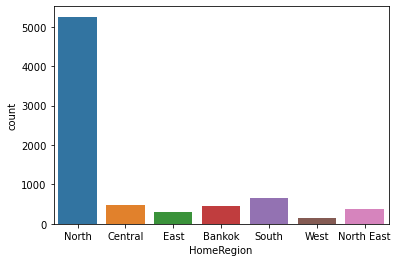

In [18]:
sns.countplot(df.HomeRegion)

In [19]:
df.drop(df[df.HomeRegion !='North'].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,Female,School of Liberal Arts,2,North,3.61,3.94,3.33,3.41,3.86,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,Male,School of Liberal Arts,2,North,3.04,3.75,2.30,1.75,2.82,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,Female,School of Liberal Arts,2,North,3.40,3.73,2.30,3.30,2.92,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,Female,School of Liberal Arts,2,North,3.22,3.60,2.73,3.05,3.33,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,Female,School of Liberal Arts,2,North,3.83,4.00,3.90,3.65,4.00,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


In [20]:
df['HomeRegion'].unique()

array(['North'], dtype=object)

In [21]:
len(df[df.duplicated()])

2

In [22]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,Female,School of Liberal Arts,2,North,3.61,3.94,3.33,3.41,3.86,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,Male,School of Liberal Arts,2,North,3.04,3.75,2.30,1.75,2.82,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,Female,School of Liberal Arts,2,North,3.40,3.73,2.30,3.30,2.92,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,Female,School of Liberal Arts,2,North,3.22,3.60,2.73,3.05,3.33,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,Female,School of Liberal Arts,2,North,3.83,4.00,3.90,3.65,4.00,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


In [23]:
len(df[df.duplicated()])

0

In [24]:
threshold = 50 # We nomally allows only 30%-40% missing value for each row

# Get row-index for rows with missing values >= threshold
df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]

# Get data of row(s) with missing values > threshold
df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]]


,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
35,Female,School of Management,2,North,3.65,3.66,3.61,3.42,3.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
37,Female,School of Management,2,North,3.98,4.00,4.00,3.95,3.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
79,Female,School of Management,2,North,3.80,3.86,3.30,3.90,3.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
83,Female,School of Management,2,North,3.85,4.00,3.83,3.70,4.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
90,Female,School of Management,2,North,3.98,4.00,4.00,3.97,4.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
202,Female,School of Agro-industry,2,North,3.89,3.90,3.96,3.79,3.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
205,Female,School of Agro-industry,2,North,3.59,3.79,3.33,3.56,3.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
210,Female,School of Agro-industry,2,North,3.64,3.95,3.80,3.26,3.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
269,Male,School of Law,2,North,3.09,3.43,2.08,2.91,3.89,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
303,Female,School of Health Science,2,North,3.66,3.57,3.73,3.47,3.83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


In [25]:
threshold =50

# Select features with % missing value less than or equal to the threshold
df = df[df.columns[(df.isnull().sum()/len(df)*100) <= threshold]]

# Select samples with % missing value less than or equal to the threshold
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]

# Reset index
df.reset_index(drop=True, inplace=True)

In [26]:
threshold = 50 # We nomally allows only 30%-40% missing value for each row

# Get row-index for rows with missing values >= threshold
df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]

# Get data of row(s) with missing values > threshold
df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) >= threshold]]

,Sex,FacultyName,TCAS,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status


In [27]:
df = df.drop(['HomeRegion','TCAS'], axis=1)

In [28]:
df.head()

,Sex,FacultyName,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,Female,School of Liberal Arts,3.61,3.94,3.33,3.41,3.86,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,Male,School of Liberal Arts,3.04,3.75,2.30,1.75,2.82,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,Female,School of Liberal Arts,3.40,3.73,2.30,3.30,2.92,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,Female,School of Liberal Arts,3.22,3.60,2.73,3.05,3.33,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,Female,School of Liberal Arts,3.83,4.00,3.90,3.65,4.00,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


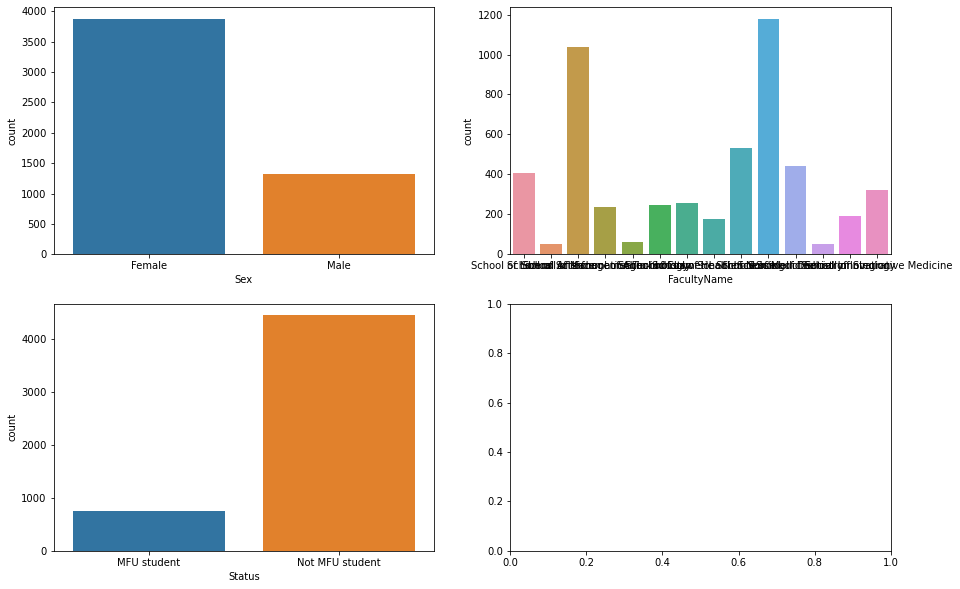

In [29]:
cat_data = df.select_dtypes(include=['object']) 

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(cat_data[i], ax=subplot)

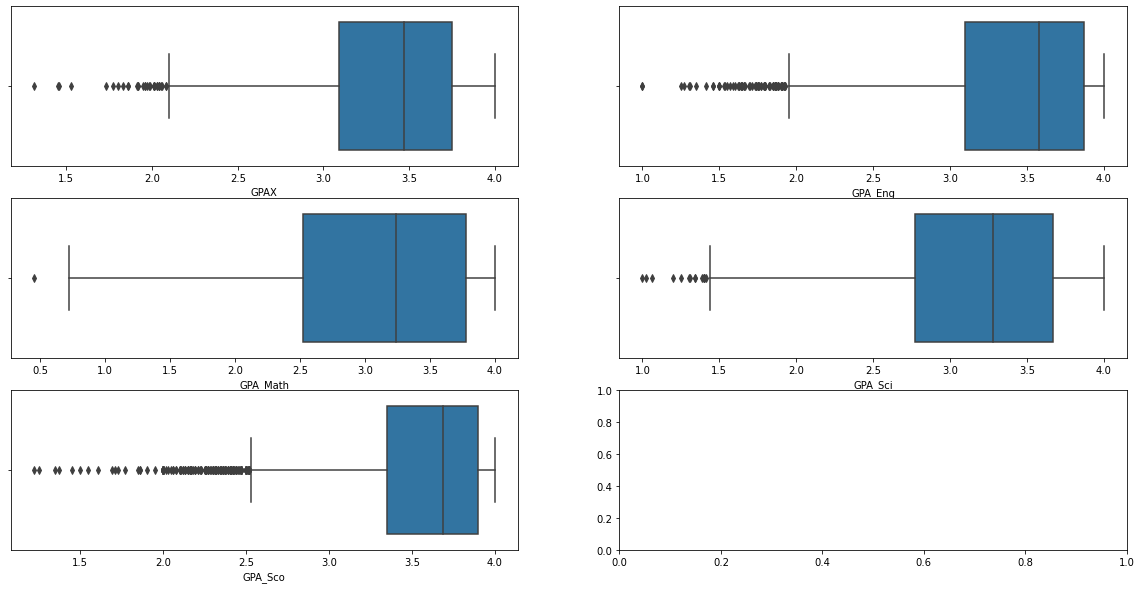

In [30]:
# Select only 2 numeric features 
num_data = df[['GPAX', 'GPA_Eng',
       'GPA_Math', 'GPA_Sci', 'GPA_Sco']]

# Create box plots for all numeric features
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

In [31]:
# Summary statistics for String (object) features:
df.describe(include=['object'])

,Sex,FacultyName,Status
count,5200,5200,5200
unique,2,14,2
top,Female,School of Medicine,Not MFU student
freq,3875,1178,4441


In [32]:
#Summary statistics for other types
df.describe(include=['number'])

,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,3.381133,3.423921,3.100639,3.181306,3.558690,0.665192,0.790192,0.641538,0.683462,0.404038,...,0.421346,0.851923,0.112115,0.035962,0.134038,0.185769,0.968077,0.543654,0.088654,0.172500
std,0.453856,0.539126,0.753267,0.603875,0.439323,0.471969,0.407210,0.479595,0.465170,0.490752,...,0.493822,0.355210,0.315539,0.186212,0.340726,0.388958,0.175812,0.498139,0.284271,0.377851
min,1.310000,1.000000,0.450000,1.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.090000,3.100000,2.520000,2.770000,3.350000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.470000,3.580000,3.240000,3.280000,3.690000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,3.750000,3.870000,3.780000,3.670000,3.900000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Feature Engineering

In [33]:
# get all nominal / ordinal / Boolean features
cat_data = df[['Sex', 'FacultyName']]
# Question data
Q_data = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42']]
# get all numberic features
num_data = df[['GPAX','GPA_Eng','GPA_Math', 'GPA_Sci' ,'GPA_Sco']]

# get class for classification problem
class_target = df[['Status']]

In [34]:
cat_data.head()

,Sex,FacultyName
0,Female,School of Liberal Arts
1,Male,School of Liberal Arts
2,Female,School of Liberal Arts
3,Female,School of Liberal Arts
4,Female,School of Liberal Arts


In [35]:
num_data.head()

,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco
0,3.61,3.94,3.33,3.41,3.86
1,3.04,3.75,2.30,1.75,2.82
2,3.40,3.73,2.30,3.30,2.92
3,3.22,3.60,2.73,3.05,3.33
4,3.83,4.00,3.90,3.65,4.00


In [36]:
class_target.head()

,Status
0,MFU student
1,MFU student
2,MFU student
3,MFU student
4,MFU student


In [37]:
Q_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [39]:
df.FacultyName.unique()

array(['School of Liberal Arts', 'School of Science',
       'School of Management', 'School of Information Technology',
       'School of Agro-industry', 'School of Law',
       'School of Cosmetic Science', 'School of Health Science',
       'School of Nursing', 'School of Medicine', 'School of Dentistry',
       'School of Social Innovation', 'School of Sinology',
       'School of Integrative Medicine'], dtype=object)

In [40]:
nominal_data = df[['Sex','FacultyName']]
nominal_data = pd.get_dummies(nominal_data)
nominal_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Medicine,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
transform_num_data = pd.concat([nominal_data], axis=1)
transform_num_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Medicine,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


##### Normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
norm_data = mm.fit_transform(transform_num_data)
norm_data = pd.DataFrame(norm_data, columns=transform_num_data.columns) 
norm_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Medicine,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
norm_data1 = pd.concat([norm_data,num_data, Q_data,class_target], axis=1)
norm_data1.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


In [44]:
norm_data1.to_csv('normdata_version.csv')

### 5. KNN

In [45]:
norm_data1.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,MFU student
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student


In [46]:
# Column names
df.columns

Index(['Sex', 'FacultyName', 'GPAX', 'GPA_Eng', 'GPA_Math', 'GPA_Sci',
       'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Status'],
      dtype='object')

In [62]:
X = df.iloc[:,1:49] 
X = pd.concat([norm_data], axis=1)
X.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,FacultyName_School of Management,FacultyName_School of Medicine,FacultyName_School of Nursing,FacultyName_School of Science,FacultyName_School of Sinology,FacultyName_School of Social Innovation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
Y = df.iloc[:, -1]
Y.head()

0    MFU student
1    MFU student
2    MFU student
3    MFU student
4    MFU student
Name: Status, dtype: object

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  0.5561538461538461
Training Classification Error:  0.4438461538461539
Confusion matrix:
[[ 268  491]
 [1817 2624]]


### Splitting Training-Test Data:

In [72]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 70% : 30% by specify test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

# Print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3640, 16)
y_train shape:  (3640,)
x_test shape:  (1560, 16)
y_test shape:  (1560,)


In [73]:
Y.value_counts()

Not MFU student    4441
MFU student         759
Name: Status, dtype: int64

In [74]:
y_train.value_counts()

Not MFU student    3099
MFU student         541
Name: Status, dtype: int64

In [75]:
y_test.value_counts()

Not MFU student    1342
MFU student         218
Name: Status, dtype: int64

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.6730769230769231
Tesing Classification Error:  0.32692307692307687
Confusion matrix:
[[110 108]
 [402 940]]


In [77]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.16790605, 0.13392472, 0.13092446, 0.13191319, 0.1708982 ,
        0.12992215, 0.1329217 , 0.13492131, 0.12892866, 0.14291453]),
 'score_time': array([0.1799221 , 0.15993381, 0.15288448, 0.12493587, 0.18489504,
        0.15991092, 0.15690541, 0.15690851, 0.13991666, 0.11293149]),
 'test_score': array([0.53269231, 0.41538462, 0.61923077, 0.63269231, 0.48846154,
        0.59615385, 0.55961538, 0.51730769, 0.38076923, 0.18076923]),
 'train_score': array([0.56132479, 0.52286325, 0.56880342, 0.71132479, 0.69059829,
        0.73034188, 0.46367521, 0.46837607, 0.54722222, 0.46111111])}

In [85]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.53269231 0.41538462 0.61923077 0.63269231 0.48846154 0.59615385
 0.55961538 0.51730769 0.38076923 0.18076923]
Cross Validation Accuracy: 0.492 +/- 0.130


In [86]:
from sklearn import metrics
k_range = list(range(1,30))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) 
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.5759615384615385
2 0.49230769230769234
3 0.5682692307692307
4 0.5469230769230768
5 0.5523076923076924
6 0.5392307692307692
7 0.5425
8 0.5421153846153846
9 0.5825
10 0.58
11 0.6040384615384615
12 0.5994230769230768
13 0.609423076923077
14 0.5948076923076923
15 0.6107692307692307
16 0.5967307692307692
17 0.6221153846153846
18 0.6034615384615385
19 0.630576923076923
20 0.6257692307692307
21 0.6248076923076924
22 0.6186538461538462
23 0.6236538461538461
24 0.615
25 0.6251923076923076
26 0.6192307692307693
27 0.6192307692307693
28 0.6186538461538462
29 0.6534615384615383


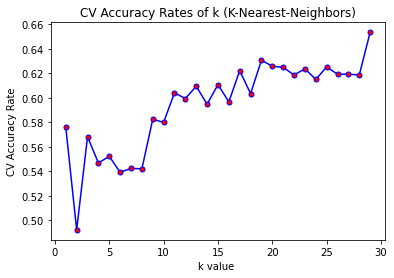

In [87]:
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [88]:
import operator
index, value = max(enumerate(scores_cv),key=operator.itemgetter(1))
print('best k =',index+1,'accuracy',value)

best k = 29 accuracy 0.6534615384615383


In [90]:
from sklearn.neighbors import KNeighborsClassifier
best_knn = KNeighborsClassifier(n_neighbors=29, metric = 'euclidean') 
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 29
knn = KNeighborsClassifier(n_neighbors=29, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.8602564102564103
Tesing Classification Error:  0.1397435897435897
Confusion matrix:
[[   0  218]
 [   0 1342]]


In [98]:
import pickle
pickle.dump(best_knn, open('best_knn.pkl','wb'))
pickle.dump(norm_data1, open('normalization.pkl','wb'))

# The End